In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing and scaling handwritten digits dataset
from tensorflow import keras

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape( len(X_test), 28*28)

X_train_flat = X_train_flat / 255
X_test_flat = X_test_flat / 255

In [3]:
class My_Neural_network:
    
    def __init__ (self,units,input_shape):
        self.units = units
        self.input_shape = input_shape
        self.weights = self.xavier_initializer(input_shape,units)
        self.biases = np.zeros(units)
        
    def xavier_initializer(self,input_dim, output_dim):
        limit = np.sqrt(6 / (input_dim + output_dim))
        return np.random.uniform(-limit, limit, (input_dim, output_dim))
    
    def fit(self, x_train, y_train, epochs=5, learning_rate=0.001):
        self.length = len(x_train)
        self.y_encoded = np.eye(self.units)[y_train]
        self.y_train = y_train
        
        self.prediction_matrix = np.dot(x_train,self.weights)
        self.prediction_matrix = self.prediction_matrix + self.biases
        self.prediction_matrix = self.sigmoid(self.prediction_matrix)
        
        for i in range(epochs):
            self.prediction_matrix = np.dot(x_train,self.weights)
            self.prediction_matrix = self.prediction_matrix + self.biases
            self.prediction_matrix = self.sigmoid(self.prediction_matrix)
            
            if (i+1)%100 == 0:
                print(f"Epoch- {i+1}   Loss- {self.loss_calculation()}" )

            temp = (self.prediction_matrix - self.y_encoded) * self.prediction_matrix * (1 - self.prediction_matrix)

            w_gradients = np.dot( x_train.T, temp ) / self.length
            self.weights = self.weights - (learning_rate * w_gradients)

            b_gradients = np.mean(temp, axis=0)
            self.biases = self.biases - (learning_rate * b_gradients)
        
    def loss_calculation(self):
        total_loss=0
        for i in range(self.length):
            total_loss += self.cross_entropy(self.prediction_matrix[i],self.y_train[i])
            
        return total_loss / self.length
        
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def cross_entropy(self, prediction_matrix_value, y_train_value):
        epsilon = 1e-6
        return -np.log( prediction_matrix_value[y_train_value] + epsilon)
    
    def predict(self, x_test):
        self.predicted_matrix = np.dot(x_test,self.weights)
        self.predicted_matrix = self.predicted_matrix + self.biases
        self.predicted_matrix = self.sigmoid(self.predicted_matrix)
        return self.predicted_matrix
    
    def accuracy_score(self,predicted_matrix,y_test):
        correct = 0
        for i in range(len(predicted_matrix)):
            if y_test[i] == np.argmax(predicted_matrix[i]):
                correct += 1
                
        return correct/len(predicted_matrix)
    

In [4]:
model = My_Neural_network(10, input_shape=784)

In [5]:
model.fit(X_train_flat, y_train, epochs=1200, learning_rate=1)

Epoch- 100   Loss- 0.6207142127858246
Epoch- 200   Loss- 0.5508950491304393
Epoch- 300   Loss- 0.523817625292195
Epoch- 400   Loss- 0.5085427925284033
Epoch- 500   Loss- 0.4984509197774567
Epoch- 600   Loss- 0.49118574457990083
Epoch- 700   Loss- 0.4856710520348599
Epoch- 800   Loss- 0.4813341994729169
Epoch- 900   Loss- 0.4778371964258396
Epoch- 1000   Loss- 0.47496492483055486
Epoch- 1100   Loss- 0.4725723924783081
Epoch- 1200   Loss- 0.4705574155008711


In [6]:
predicted = model.predict(X_test_flat)

In [9]:
model.accuracy_score(predicted,y_test)

0.9115

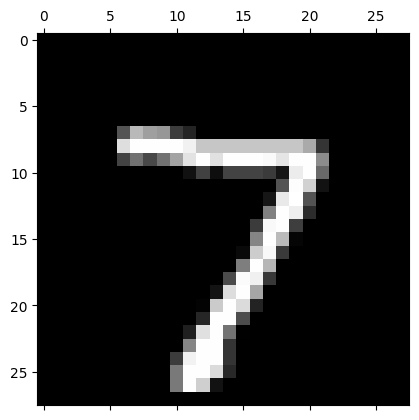

In [24]:
plt.matshow(X_test[0],cmap=plt.cm.gray)

In [25]:
np.argmax(predicted[0])

7

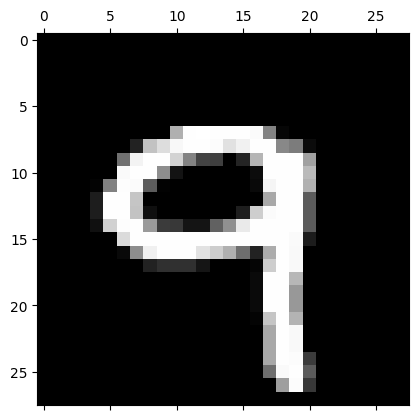

In [27]:
plt.matshow(X_test[634],cmap=plt.cm.gray)

In [28]:
np.argmax(predicted[634])

9

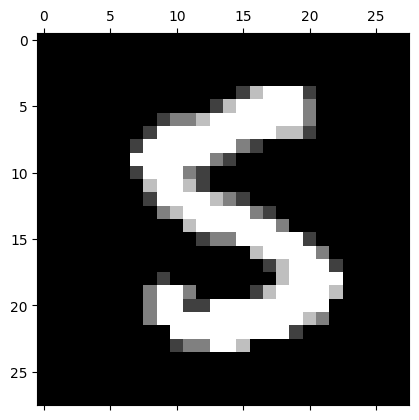

In [29]:
plt.matshow(X_test[132],cmap=plt.cm.gray)

In [30]:
np.argmax(predicted[132])

5